# **22. Dimensionality Reduction in Python**

High-dimensional datasets can be overwhelming and leave you not knowing where to start. Typically, you’d visually explore a new dataset first, but when you have too many dimensions the classical approaches will seem insufficient. Fortunately, there are visualization techniques designed specifically for high dimensional data and you’ll be introduced to these in this course. After exploring the data, you’ll often find that many features hold little information because they don’t show any variance or because they are duplicates of other features. You’ll learn how to detect these features and drop them from the dataset so that you can focus on the informative ones. In a next step, you might want to build a model on these features, and it may turn out that some don’t have any effect on the thing you’re trying to predict. You’ll learn how to detect and drop these irrelevant features too, in order to reduce dimensionality and thus complexity. Finally, you’ll learn how feature extraction techniques can reduce dimensionality for you through the calculation of uncorrelated principal components.


[reference Link](https://github.com/odenipinedo/Python/blob/master/datacamp/dimensionality%20reduction%20in%20Python.ipynb)

## **Chapter 1 - Exploring High Dimensional Data**

You'll be introduced to the concept of dimensionality reduction and will learn when an why this is important. You'll learn the difference between feature selection and feature extraction and will apply both techniques for data exploration. The chapter ends with a lesson on t-SNE, a powerful feature extraction technique that will allow you to visualize a high-dimensional dataset.


### **Introduction**
___
- Tidy data
    - every column is a feature
    - every row is an observation for each variable
    - Pandas dataframe .shape attribute
- high dimensionality > 10 columns
- When to use dimensionality reduction?
    - drop columns with no variance (i.e. same values)
    - Pandas dataframe .describe() method
        - no variance = std = 0, max and min are the same
        - exclude = 'number' --> will show information for non-numeric values
___

### Finding the number of dimensions in a dataset
A larger sample of the Pokemon dataset has been loaded for you as the pandas DataFrame **pokemon_df**. How many dimensions, or columns are in this dataset?

```python
In [2]:
pokemon_df
Out[2]:

      HP  Attack  Defense  Generation                   Name     Type  Legendary
0     45      49       49           1              Bulbasaur    Grass      False
1     60      62       63           1                Ivysaur    Grass      False
2     80      82       83           1               Venusaur    Grass      False
3     80     100      123           1  VenusaurMega Venusaur    Grass      False
4     39      52       43           1             Charmander     Fire      False
..   ...     ...      ...         ...                    ...      ...        ...
155  160     110       65           1                Snorlax   Normal      False
156   41      64       45           1                Dratini   Dragon      False
157   61      84       65           1              Dragonair   Dragon      False
158   91     134       95           1              Dragonite   Dragon      False
159  100     100      100           1                    Mew  Psychic      False

[160 rows x 7 columns]
```

#Removing features without variance

#A sample of the Pokemon dataset has been loaded as pokemon_df. To
#get an idea of which features have little variance you should use
#the IPython Shell to calculate summary statistics on this sample.
#Then adjust the code to create a smaller, easier to understand,
#dataset.

```python
# Leave this list as is
number_cols = ['HP', 'Attack', 'Defense']

# Remove the feature without variance from this list
non_number_cols = ['Name', 'Type']

# Create a new DataFrame by subselecting the chosen features
df_selected = pokemon_df[number_cols + non_number_cols]

# Prints the first 5 lines of the new DataFrame
print(df_selected.head())
```

```python
<script.py> output:
      HP  Attack  Defense                   Name   Type
   0  45      49       49              Bulbasaur  Grass
   1  60      62       63                Ivysaur  Grass
   2  80      82       83               Venusaur  Grass
   3  80     100      123  VenusaurMega Venusaur  Grass
   4  39      52       43             Charmander   Fire

#All Pokemon in this dataset are non-legendary and from generation
#one so you could choose to drop those two features.

```

**Feature selection vs feature extraction**
___
- Why reduce dimensionality?
    - your dataset will:
        - be less complex
        - require less disk space
        - have lower chance of model overfitting
- Feature selection
    - .drop('column name', axis=1) [axis indicates column instead of row]
- Building a pairplot
    - sns.pairplot(data, hue='', diag_kind='hist')
- Feature extraction
    - calculating new feature(s) from original feature(s)
___

### Visually detecting redundant features

Data visualization is a crucial step in any data exploration. Let's
use Seaborn to explore some samples of the US Army ANSUR body
measurement dataset.

Two data samples have been pre-loaded as ansur_df_1 and ansur_df_2.

Seaborn has been imported as sns.

```python
# Create a pairplot and color the points using the 'Gender' feature
sns.pairplot(ansur_df_1, hue='Gender', diag_kind='hist')

# Show the plot
plt.show()

```

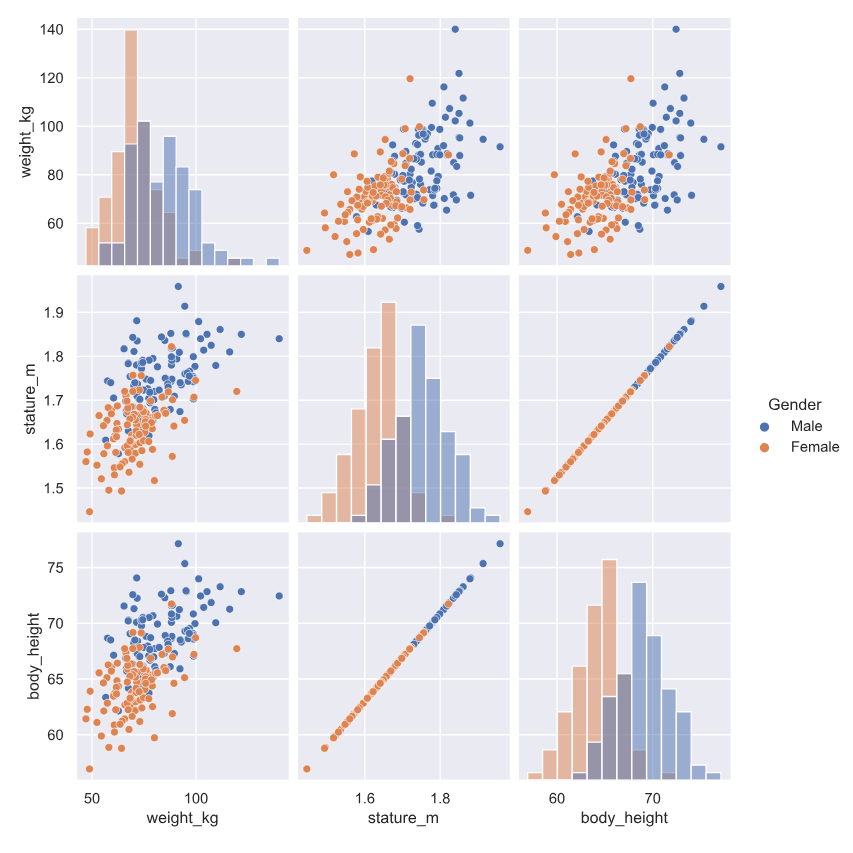

Two features are basically duplicates, remove one of them from
the dataset.

```python
# Remove one of the redundant features
reduced_df = ansur_df_1.drop('stature_m', axis=1)

# Create a pairplot and color the points using the 'Gender' feature
sns.pairplot(reduced_df, hue='Gender')

# Show the plot
plt.show()
```

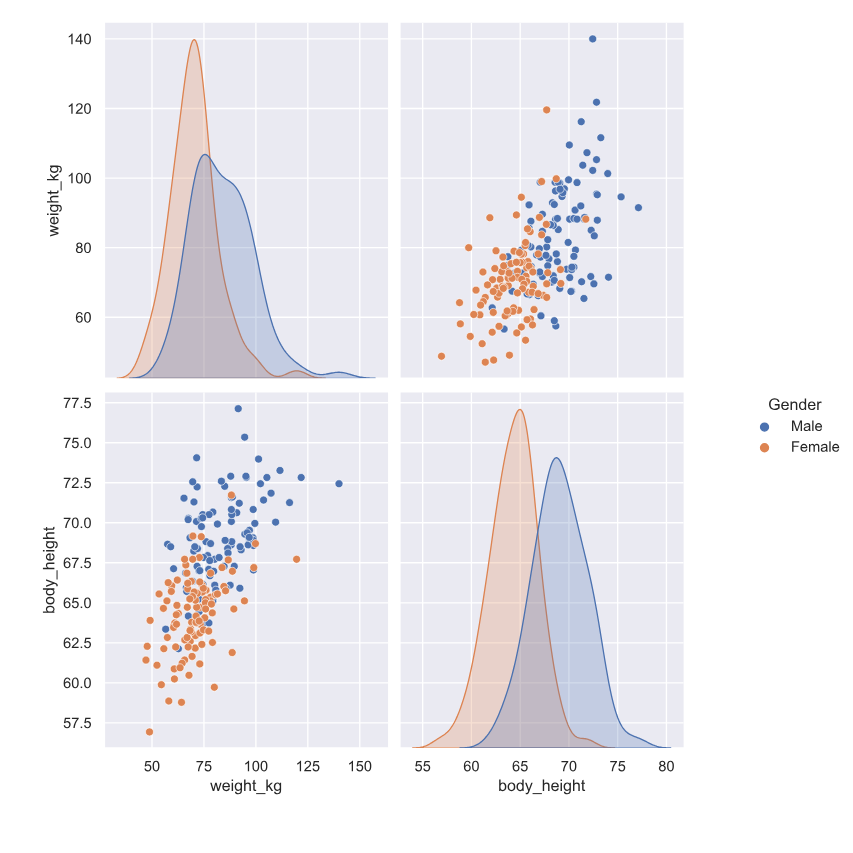

the body height (inches) and stature (meters) hold the same information in a different unit

Now create a pairplot of the ansur_df_2 data sample and color the
points using the 'Gender' feature.

```python
# Create a pairplot and color the points using the 'Gender' feature
sns.pairplot(ansur_df_2, hue='Gender', diag_kind='hist')

# Show the plot
plt.show()

```

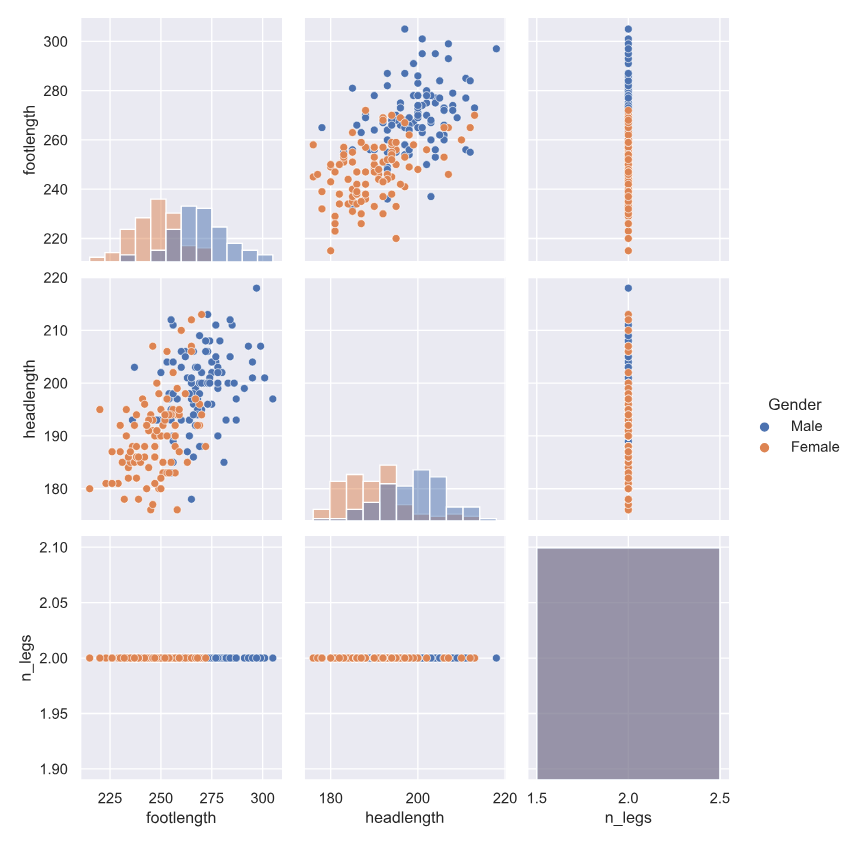

One feature has no variance, remove it from the dataset.
Remove the redundant feature
reduced_df = ansur_df_2.drop('n_legs', axis=1)

```python
# Create a pairplot and color the points using the 'Gender' feature
sns.pairplot(reduced_df, hue='Gender', diag_kind='hist')

# Show the plot
plt.show()
```

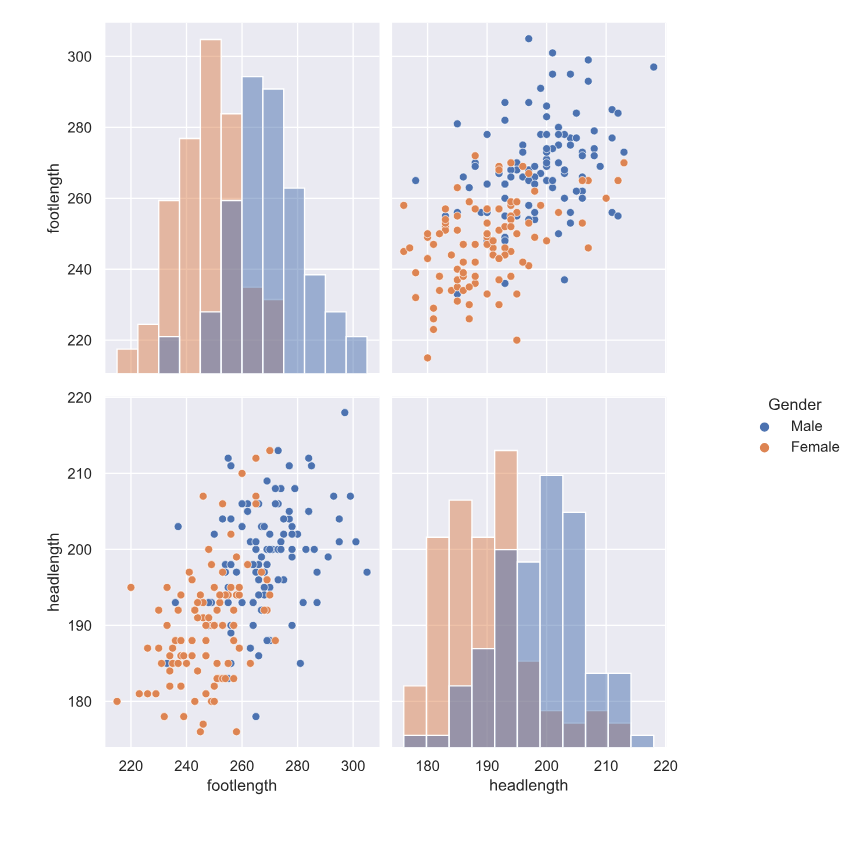

all the individuals in the second sample have two legs.

### **t-SNE visualization of high-dimensional data**
___
- t-distributed stochastic neighbor embedding
- t-SNE maximizes distance in 2-dimensional space between dimensions in higher dimensional space
- does not work with non-numeric values
- learning rate (10-1000) - lower number is conservative
___

### Fitting t-SNE to the ANSUR data

t-SNE is a great technique for visual exploration of high dimensional
datasets. In this exercise, you'll apply it to the ANSUR dataset. You'll
remove non-numeric columns from the pre-loaded dataset df and fit TSNE to
this numeric dataset.

```python
# Non-numerical columns in the dataset
non_numeric = ['Branch', 'Gender', 'Component']

# Drop the non-numerical columns from df
df_numeric = df.drop(non_numeric, axis=1)

# Create a t-SNE model with learning rate 50
m = TSNE(learning_rate=50)

# Fit and transform the t-SNE model on the numeric dataset
tsne_features = m.fit_transform(df_numeric)

#################################################
#t-SNE reduced the more than 90 features in the dataset to just 2
#which you can now plot.
#################################################

```

### t-SNE visualisation of dimensionality

Time to look at the results of your hard work. In this exercise,
you will visualize the output of t-SNE dimensionality reduction on
the combined male and female Ansur dataset. You'll create 3
scatterplots of the 2 t-SNE features ('x' and 'y') which were
added to the dataset df. In each scatterplot you'll color the
points according to a different categorical variable.

seaborn has already been imported as sns and matplotlib.pyplot as
plt.


```python
# Color the points according to Army Component
sns.scatterplot(x="x", y="y", hue='Component', data=df)

# Show the plot
plt.show()

````

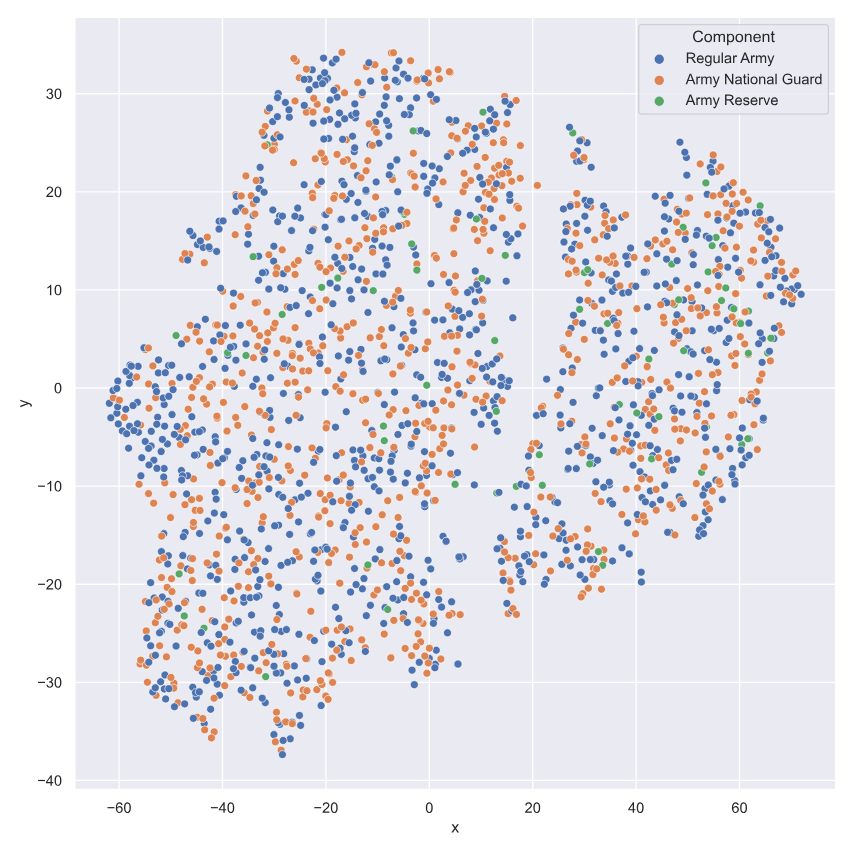

In [ ]:
# Color the points by Army Branch
sns.scatterplot(x="x", y="y", hue='Branch', data=df)

# Show the plot
plt.show()

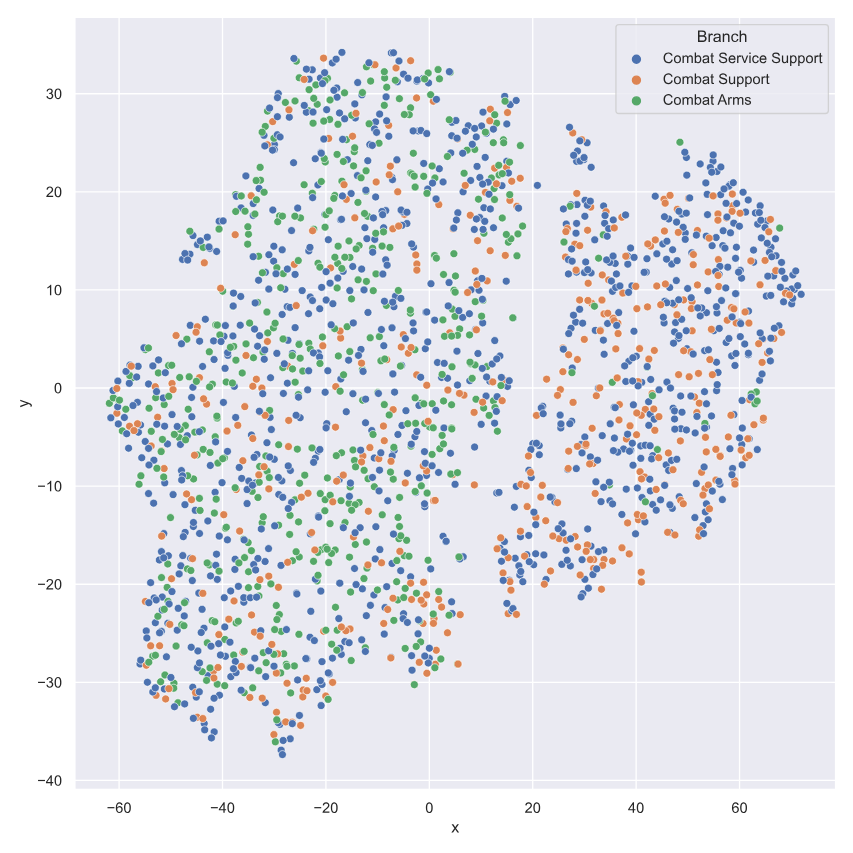

In [ ]:
# Color the points by Gender
sns.scatterplot(x="x", y="y", hue='Gender', data=df)

# Show the plot
plt.show()

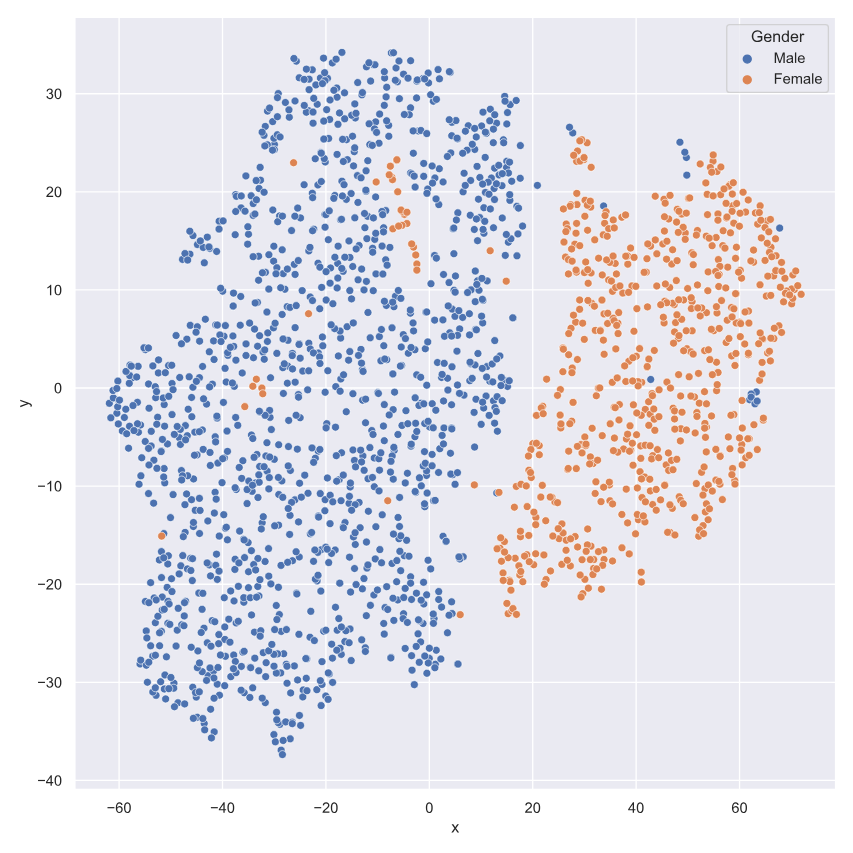

There is a Male and a Female cluster. t-SNE found these gender
differences in body shape without being told about them explicitly!

From the second plot you learned there are more males in the
Combat Arms Branch.

# **Chapter 2 - Feature Selection I - Selecting for Feature Information** 

In this first out of two chapters on feature selection, you'll learn about the curse of dimensionality and how dimensionality reduction can help you overcome it. You'll be introduced to a number of techniques to detect and remove features that bring little added value to the dataset. Either because they have little variance, too many missing values, or because they are strongly correlated to other features.



**The curse of dimensionality**
___
- as number of features increase in order to better fit a model, the number of observations must increase exponentially
___


### Train - test split

In this chapter, you will keep working with the ANSUR dataset.
Before you can build a model on your dataset, you should first
decide on which feature you want to predict. In this case, you're
trying to predict gender.

You need to extract the column holding this feature from the
dataset and then split the data into a training and test set. The
training set will be used to train the model and the test set will
be used to check its performance on unseen data.

ansur_df has been pre-loaded for you.


```python
# Import train_test_split()
from sklearn.model_selection import train_test_split

# Select the Gender column as the feature to be predicted (y)
y = ansur_df['Gender']

# Remove the Gender column to create the training data
X = ansur_df.drop('Gender', axis=1)

# Perform a 70% train and 30% test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print(f"{X_test.shape[0]} rows in test set vs. {X_train.shape[0]} in training set, {X_test.shape[1]} Features.")
#################################################
#<script.py> output:
#    300 rows in test set vs. 700 in training set. 91 Features.
#################################################

```

### Fitting and testing the model

In the previous exercise, you split the dataset into X_train,
X_test, y_train, and y_test. These datasets have been pre-loaded
for you. You'll now create a support vector machine classifier
model (SVC()) and fit that to the training data. You'll then
calculate the accuracy on both the test and training set to detect
overfitting.


```python
# Import SVC from sklearn.svm and accuracy_score from sklearn.metrics
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create an instance of the Support Vector Classification class
svc = SVC()

# Fit the model to the training data
svc.fit(X_train, y_train)

# Calculate accuracy scores on both train and test data
accuracy_train = accuracy_score(y_train, svc.predict(X_train))
accuracy_test = accuracy_score(y_test, svc.predict(X_test))

print("{0:.1%} accuracy on test set vs. {1:.1%} on training set".format(accuracy_test, accuracy_train))

#################################################
#<script.py> output:
#    49.7% accuracy on test set vs. 100.0% on training set
#################################################
#Looks like the model badly overfits on the training data. On unseen
#data it performs worse than a random selector would.

```

### Accuracy after dimensionality reduction

You'll reduce the overfit with the help of dimensionality reduction.
In this case, you'll apply a rather drastic form of dimensionality
reduction by only selecting a single column that has some good
information to distinguish between genders. You'll repeat the
train-test split, model fit and prediction steps to compare the
accuracy on test vs. training data.

All relevant packages and y have been pre-loaded.

```python
# Assign just the 'neckcircumferencebase' column from ansur_df to X
X = ansur_df[['neckcircumferencebase']]

# Split the data, instantiate a classifier and fit the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
svc = SVC()
svc.fit(X_train, y_train)

# Calculate accuracy scores on both train and test data
accuracy_train = accuracy_score(y_train, svc.predict(X_train))
accuracy_test = accuracy_score(y_test, svc.predict(X_test))

print("{0:.1%} accuracy on test set vs. {1:.1%} on training set".format(accuracy_test, accuracy_train))

#################################################
#<script.py> output:
#   93.3% accuracy on test set vs. 94.9% on training set
#################################################
#On the full dataset the model is rubbish but with a single feature
#we can make good predictions? This is an example of the curse of
#dimensionality! The model badly overfits when we feed it too many
#features. It overlooks that neck circumference by itself is pretty
#different for males and females.
```

**Features with missing values or little variance**
___
- Variance thresholds are not always easy to interpret or compare between features
___

### Finding a good variance threshold

You'll be working on a slightly modified subsample of the ANSUR
dataset with just head measurements pre-loaded as head_df.

```python
# Create the boxplot
head_df.boxplot()

plt.show()
```

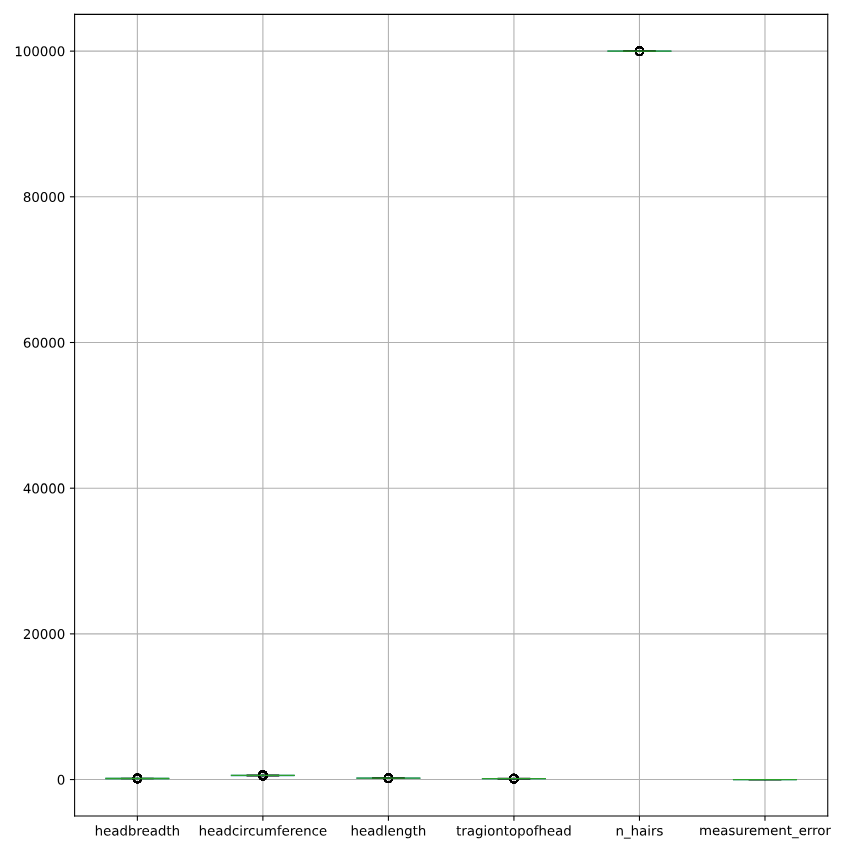

Normalize the data by dividing the dataframe with its mean values.

```python
# Normalize the data
normalized_df = head_df / head_df.mean()

#normalized_df.boxplot()
plt.show()
```

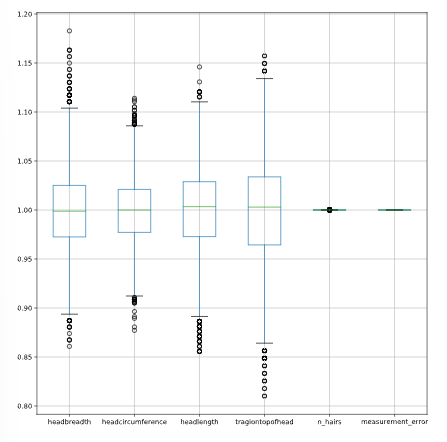

Print the variances of the normalized data.

```python
# Normalize the data
normalized_df = head_df / head_df.mean()

# Print the variances of the normalized data
print(normalized_df.var())

#################################################
#<script.py> output:
#    headbreadth          1.678952e-03
#    headcircumference    1.029623e-03
#    headlength           1.867872e-03
#    tragiontopofhead     2.639840e-03
#    n_hairs              1.002552e-08
#    measurement_error    3.231707e-27
#    dtype: float64
#################################################
#Q: If you want to remove the 2 very low variance features.
#What would be a good variance threshold?
#A: 1.0e-03

```

### Features with low variance

In the previous exercise you established that 0.001 is a good
threshold to filter out low variance features in head_df after
normalization. Now use the VarianceThreshold feature selector to
remove these features.


```python
from sklearn.feature_selection import VarianceThreshold

# Create a VarianceThreshold feature selector
sel = VarianceThreshold(threshold=0.001)

# Fit the selector to normalized head_df
sel.fit(head_df / head_df.mean())

# Create a boolean mask
mask = sel.get_support()

# Apply the mask to create a reduced dataframe
reduced_df = head_df.loc[:, mask]

print("Dimensionality reduced from {} to {}.".format(head_df.shape[1], reduced_df.shape[1]))

#################################################
#<script.py> output:
#    Dimensionality reduced from 6 to 4.
#################################################
#you've successfully removed the 2 low-variance features.

```

### Removing features with many missing values

You'll apply feature selection on the Boston Public Schools
dataset which has been pre-loaded as school_df. Calculate the
missing value ratio per feature and then create a mask to remove
features with many missing values.


```python

# Create a boolean mask on whether each feature has less than 50% missing values.
mask = school_df.isna().sum() / len(school_df) < 0.5

# Create a reduced dataset by applying the mask
reduced_df = school_df.loc[:, mask]

print(school_df.shape)
print(reduced_df.shape)


#################################################
<script.py> output:
    (131, 21)
    (131, 19)
#################################################
```


In [ ]:
#Create a boolean mask on whether each feature has less than 50%
#missing values.

#Apply the mask to school_df to select columns without many missing
#values.

# Create a boolean mask on whether each feature less than 50% missing values.
#mask = school_df.isna().sum() / len(school_df) < 0.5

# Create a reduced dataset by applying the mask
#reduced_df = school_df.loc[:, mask]

#print(school_df.shape)
#print(reduced_df.shape)

#################################################
#<script.py> output:
#    (131, 21)
#    (131, 19)
#################################################
#The number of features went down from 21 to 19.

**Pairwise correlation**
___
- pairplots
- correlation coefficient
___

In [ ]:
### Visualizing the correlation matrix

Reading the correlation matrix of ansur_df in its raw, numeric
format doesn't allow us to get a quick overview. Let's improve
this by removing redundant values and visualizing the matrix using
seaborn.

Seaborn has been pre-loaded as sns, matplotlib.pyplot as plt,
NumPy as np and pandas as pd.


```python
# Create the correlation matrix
corr = ansur_df.corr()

# Draw the heatmap
sns.heatmap(corr,  cmap=cmap, center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()
```

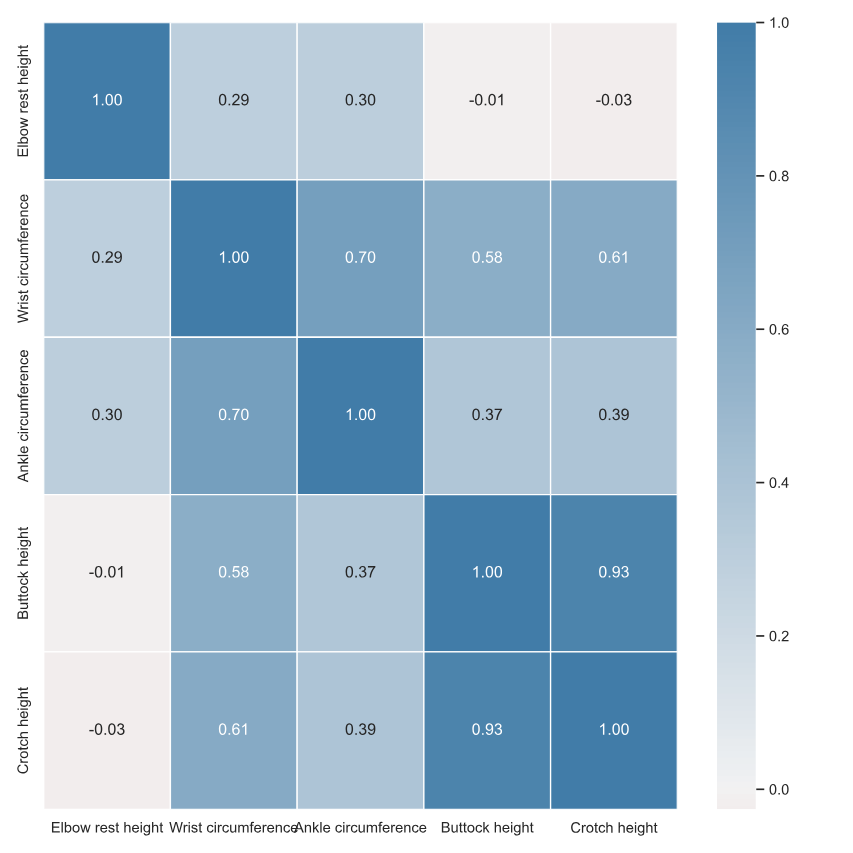

In [ ]:
#Create a boolean mask for the upper triangle of the plot.

# Create the correlation matrix
corr = ansur_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Add the mask to the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()

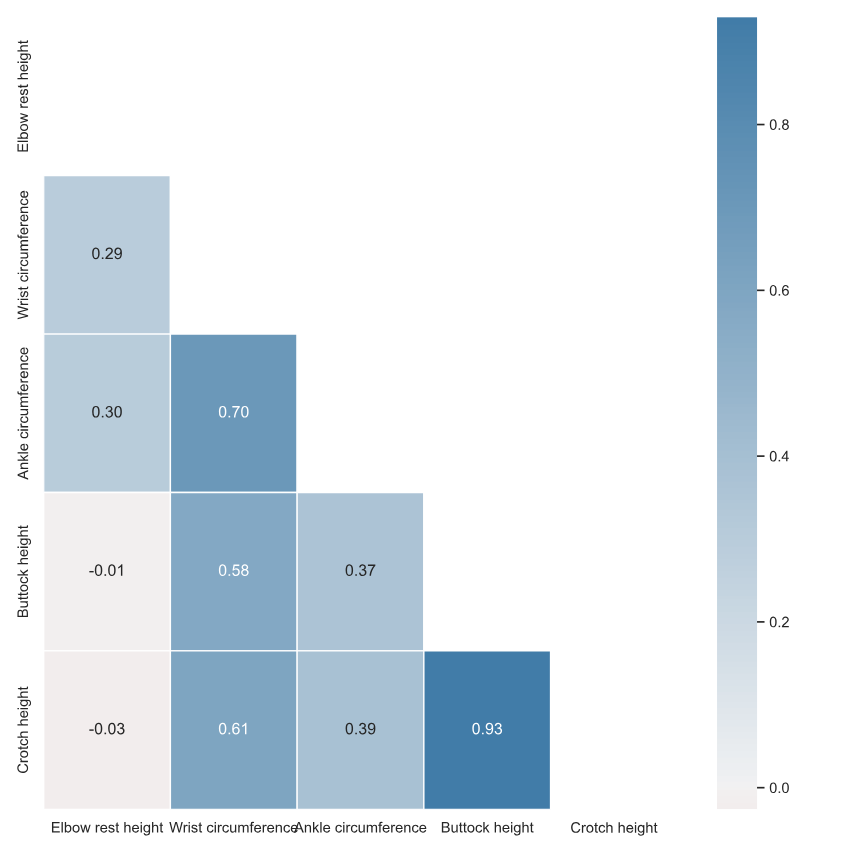


The buttock and crotch height have a 0.93 correlation coefficient.

**Removing highly correlated features**
___
- correlation caveats - Anscombe's quartet
    - nonlinear relationships or datasets with outliers may also correlate strongly
    - always visualize the scatterplot
- correlation does not imply causation
___

In [ ]:
### Filtering out highly correlated features

You're going to automate the removal of highly correlated features
in the numeric ANSUR dataset. You'll calculate the correlation
matrix and filter out columns that have a correlation coefficient
of more than 0.95 or less than -0.95.

Since each correlation coefficient occurs twice in the matrix
(correlation of A to B equals correlation of B to A) you'll want
to ignore half of the correlation matrix so that only one of the
two correlated features is removed. Use a mask trick for this
purpose.

# Calculate the correlation matrix and take the absolute value
#corr_matrix = ansur_df.corr().abs()

# Create a True/False mask and apply it
#mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
#tri_df = corr_matrix.mask(mask)

# List column names of highly correlated features (r > 0.95)
#to_drop = [c for c in tri_df.columns if any(tri_df[c] > 0.95)]

# Drop the features in the to_drop list
#reduced_df = ansur_df.drop(to_drop, axis=1)

#print("The reduced_df dataframe has {} columns".format(reduced_df.shape[1]))

#################################################
#The original dataframe has 99 columns.
#
#<script.py> output:
#    The reduced_df dataframe has 88 columns
#################################################
# You've automated the removal of highly correlated features.

In [ ]:
#Nuclear energy and pool drownings

#The dataset that has been pre-loaded for you as weird_df contains
#actual data provided by the US Centers for Disease Control &
#Prevention and Department of Energy.

#Let's see if we can find a pattern.

#Seaborn has been pre-loaded as sns and matplotlib.pyplot as plt.

# Print the first five lines of weird_df
#print(weird_df.head())
#################################################
#<script.py> output:
#       pool_drownings  nuclear_energy
#    0             421           728.3
#    1             465           753.9
#    2             494           768.8
#    3             538           780.1
#    4             430           763.7
#################################################

#Create a scatterplot with nuclear energy production on the x-axis
#and the number of pool drownings on the y-axis.

#sns.scatterplot(x='nuclear_energy', y='pool_drownings', data=weird_df)
#plt.show()

![_images/13.12.svg](_images/13.12.svg)

In [ ]:
# Print out the correlation matrix of weird_df
#print(weird_df.corr())
#################################################
#<script.py> output:
#                    pool_drownings  nuclear_energy
#    pool_drownings        1.000000        0.901179
#    nuclear_energy        0.901179        1.000000
#################################################
#While the example is silly, you'll be amazed how often people
#misunderstand correlation vs causation.

**Selecting features for model performance**
___
- feature coefficients can be used to drop features that do not contribute to the model
- Recursive Feature Elimination (RFE)
___

In [ ]:
#Building a diabetes classifier

#You'll be using the Pima Indians diabetes dataset to predict whether
#a person has diabetes using logistic regression. There are 8 features
#and one target in this dataset. The data has been split into a
#training and test set and pre-loaded for you as X_train, y_train,
#X_test, and y_test.

#A StandardScaler() instance has been predefined as scaler and a
#LogisticRegression() one as lr.

# Fit the scaler on the training features and transform these in one go
#X_train_std = scaler.fit_transform(X_train)

# Fit the logistic regression model on the scaled training data
#lr.fit(X_train_std, y_train)

# Scale the test features
#X_test_std = scaler.transform(X_test)

# Predict diabetes presence on the scaled test set
#y_pred = lr.predict(X_test_std)

# Prints accuracy metrics and feature coefficients
#print("{0:.1%} accuracy on test set.".format(accuracy_score(y_test, y_pred)))
#print(dict(zip(X.columns, abs(lr.coef_[0]).round(2))))

#################################################
#script.py> output:
#    79.6% accuracy on test set.
#    {'bmi': 0.38, 'glucose': 1.23, 'pregnant': 0.04, 'age': 0.34, 'triceps': 0.24, 'insulin': 0.19, 'family': 0.34, 'diastolic': 0.03}
#################################################

In [ ]:
#Manual Recursive Feature Elimination

#Now that we've created a diabetes classifier, let's see if we can
#reduce the number of features without hurting the model accuracy too
#much.

#On the second line of code the features are selected from the
#original dataframe. Adjust this selection.

#A StandardScaler() instance has been predefined as scaler and a
#LogisticRegression() one as lr.

#All necessary functions and packages have been pre-loaded too.

#First, run the given code, then remove the feature with the lowest
#model coefficient from X.

# Remove the feature with the lowest model coefficient
#X = diabetes_df[['pregnant', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi', 'family', 'age']]

# Performs a 25-75% train test split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Scales features and fits the logistic regression model
#lr.fit(scaler.fit_transform(X_train), y_train)

# Calculates the accuracy on the test set and prints coefficients
#acc = accuracy_score(y_test, lr.predict(scaler.transform(X_test)))
#print("{0:.1%} accuracy on test set.".format(acc))
#print(dict(zip(X.columns, abs(lr.coef_[0]).round(2))))
#################################################
#79.6% accuracy on test set.
#{'bmi': 0.38, 'glucose': 1.23, 'pregnant': 0.04, 'age': 0.34, 'triceps': 0.24, 'insulin': 0.19, 'family': 0.34, 'diastolic': 0.03}
#################################################

# Remove the feature with the lowest model coefficient
#X = diabetes_df[['pregnant', 'glucose', 'triceps', 'insulin', 'bmi', 'family', 'age']]

# Performs a 25-75% train test split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Scales features and fits the logistic regression model
#lr.fit(scaler.fit_transform(X_train), y_train)

# Calculates the accuracy on the test set and prints coefficients
#acc = accuracy_score(y_test, lr.predict(scaler.transform(X_test)))
#print("{0:.1%} accuracy on test set.".format(acc))
#print(dict(zip(X.columns, abs(lr.coef_[0]).round(2))))
#################################################
#<script.py> output:
#    80.6% accuracy on test set.
#    {'bmi': 0.39, 'glucose': 1.23, 'pregnant': 0.05, 'age': 0.35, 'triceps': 0.24, 'insulin': 0.2, 'family': 0.34}
#################################################

# Remove the 2 features with the lowest model coefficients
#X = diabetes_df[['glucose', 'triceps', 'bmi', 'family', 'age']]

# Performs a 25-75% train test split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Scales features and fits the logistic regression model
#lr.fit(scaler.fit_transform(X_train), y_train)

# Calculates the accuracy on the test set and prints coefficients
#acc = accuracy_score(y_test, lr.predict(scaler.transform(X_test)))
#print("{0:.1%} accuracy on test set.".format(acc))
#print(dict(zip(X.columns, abs(lr.coef_[0]).round(2))))
#################################################
#<script.py> output:
#    79.6% accuracy on test set.
#    {'triceps': 0.25, 'glucose': 1.13, 'family': 0.34, 'age': 0.37, 'bmi': 0.34}
#################################################

# Only keep the feature with the highest coefficient
#X = diabetes_df[['glucose']]

# Performs a 25-75% train test split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Scales features and fits the logistic regression model to the data
#lr.fit(scaler.fit_transform(X_train), y_train)

# Calculates the accuracy on the test set and prints coefficients
#acc = accuracy_score(y_test, lr.predict(scaler.transform(X_test)))
#print("{0:.1%} accuracy on test set.".format(acc))
#print(dict(zip(X.columns, abs(lr.coef_[0]).round(2))))
#################################################
#<script.py> output:
#    76.5% accuracy on test set.
#    {'glucose': 1.27}
#################################################
#Removing all but one feature only reduced the accuracy by a few percent.

In [ ]:
#Automatic Recursive Feature Elimination

#Now let's automate this recursive process. Wrap a Recursive Feature
#Eliminator (RFE) around our logistic regression estimator and pass
#it the desired number of features.

#All the necessary functions and packages have been pre-loaded and
#the features have been scaled for you.

# Create the RFE with a LogisticRegression estimator and 3 features to select
#rfe = RFE(estimator=LogisticRegression(), n_features_to_select=3, verbose=1)

# Fit the eliminator to the data
#rfe.fit(X_train, y_train)

# Print the features and their ranking (high = dropped early on)
#print(dict(zip(X.columns, rfe.ranking_)))

# Print the features that are not eliminated
#print(X.columns[rfe.support_])

# Calculates the test set accuracy
#acc = accuracy_score(y_test, rfe.predict(X_test))
#print("{0:.1%} accuracy on test set.".format(acc))

#################################################
#<script.py> output:
#    Fitting estimator with 8 features.
#    Fitting estimator with 7 features.
#    Fitting estimator with 6 features.
#    Fitting estimator with 5 features.
#    Fitting estimator with 4 features.
#    {'diastolic': 6, 'bmi': 1, 'glucose': 1, 'pregnant': 5, 'triceps': 3, 'age': 1, 'insulin': 4, 'family': 2}
#    Index(['glucose', 'bmi', 'age'], dtype='object')
#    80.6% accuracy on test set.
#################################################
#When we eliminate all but the 3 most relevant features we get a 80.6% accuracy on the test set.

**Tree-based feature selection**
___
- feature_importances_ attribute for features in random forest classifiers
___

In [ ]:
#Building a random forest model

#You'll again work on the Pima Indians dataset to predict whether
#an individual has diabetes. This time using a random forest
#classifier. You'll fit the model on the training data after
#performing the train-test split and consult the feature importance
#values.

#The feature and target datasets have been pre-loaded for you as X
#and y. Same goes for the necessary packages and functions.

# Perform a 75% training and 25% test data split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Fit the random forest model to the training data
#rf = RandomForestClassifier(random_state=0)
#rf.fit(X_train, y_train)

# Calculate the accuracy
#acc = accuracy_score(y_test, rf.predict(X_test))

# Print the importances per feature
#print(dict(zip(X.columns, rf.feature_importances_.round(2))))

# Print accuracy
#print("{0:.1%} accuracy on test set.".format(acc))

#################################################
#<script.py> output:
#    {'diastolic': 0.08, 'bmi': 0.09, 'glucose': 0.21, 'pregnant': 0.09, 'triceps': 0.11, 'age': 0.16, 'insulin': 0.13, 'family': 0.12}
#    77.6% accuracy on test set.
#################################################
#The random forest model gets 78% accuracy on the test set and 'glucose' is the most important feature (0.21).

In [ ]:
#Random forest for feature selection
#Now lets use the fitted random model to select the most important
#features from our input dataset X.

#The trained model from the previous exercise has been pre-loaded
#for you as rf.

#Create a mask for features with an importance higher than 0.15.
# Create a mask for features importances above the threshold
#mask = rf.feature_importances_ > 0.15

# Prints out the mask
#print(mask)
#################################################
#<script.py> output:
#    [False  True False False False False False  True]
#################################################

#Sub-select the most important features by applying the mask to X.
# Apply the mask to the feature dataset X
#reduced_X = X.loc[:, mask]

# prints out the selected column names
#print(reduced_X.columns)
#################################################
#<script.py> output:
#    Index(['glucose', 'age'], dtype='object')
#################################################
#Only the features 'glucose' and 'age' were considered sufficiently important.

In [ ]:
#Recursive Feature Elimination with random forests

#You'll wrap a Recursive Feature Eliminator around a random forest
#model to remove features step by step. This method is more
#conservative compared to selecting features after applying a single
#importance threshold. Since dropping one feature can influence the
#relative importances of the others.

#You'll need these pre-loaded datasets: X, X_train, y_train.

#Functions and classes that have been pre-loaded for you are:
#RandomForestClassifier(), RFE(), train_test_split().

#Create a recursive feature eliminator that will select the 2 most
#important features using a random forest model.

# Wrap the feature eliminator around the random forest model
#rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=2, verbose=1)

#Fit the recursive feature eliminator to the training data.
# Fit the model to the training data
#rfe.fit(X_train, y_train)
#################################################
#<script.py> output:
#    Fitting estimator with 8 features.
#    Fitting estimator with 7 features.
#    Fitting estimator with 6 features.
#    Fitting estimator with 5 features.
#    Fitting estimator with 4 features.
#    Fitting estimator with 3 features.
#################################################

#Create a mask using the fitted eliminator, then apply it to the
#feature dataset X.

# Create a mask using an attribute of rfe
#mask = rfe.support_

# Apply the mask to the feature dataset X and print the result
#reduced_X = X.loc[:, mask]
#print(reduced_X.columns)
#################################################
#<script.py> output:
#    Index(['glucose', 'insulin'], dtype='object')
#################################################

#Change the settings of RFE() to eliminate 2 features at each step.
# Set the feature eliminator to remove 2 features on each step
#rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=2, step=2, verbose=1)

# Fit the model to the training data
#rfe.fit(X_train, y_train)

# Create a mask
#mask = rfe.support_

# Apply the mask to the feature dataset X and print the result
#reduced_X = X.loc[:, mask]
#print(reduced_X.columns)
#################################################
#<script.py> output:
#    Fitting estimator with 8 features.
#    Fitting estimator with 6 features.
#    Fitting estimator with 4 features.
#    Index(['glucose', 'insulin'], dtype='object')
#################################################
#Compared to the quick and dirty single threshold method from the
#previous exercise one of the selected features is different.

**Regularized linear regression**
___
- .coef_ attribute
- R squared value --> .score()
- regularization --> simplify MSE values, solve for overfitting
    - alpha - too low overfitting, too high innacurate / underfitting
    - LASSO - least absolute shrinkage and selection operator
___

In [ ]:
#Creating a LASSO regressor

#You'll be working on the numeric ANSUR body measurements dataset to
#predict a persons Body Mass Index (BMI) using the pre-imported
#Lasso() regressor. BMI is a metric derived from body height and
#weight but those two features have been removed from the dataset
#to give the model a challenge.

#You'll standardize the data first using the StandardScaler() that
#has been instantiated for you as scaler to make sure all
#coefficients face a comparable regularizing force trying to bring
#them down.

#All necessary functions and classes plus the input datasets X and
#y have been pre-loaded.

# Set the test size to 30% to get a 70-30% train test split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Fit the scaler on the training features and transform these in one go
#X_train_std = scaler.fit_transform(X_train)

# Create the Lasso model
#la = Lasso()

# Fit it to the standardized training data
#la.fit(X_train_std, y_train)

#################################################
#################################################
#You've fitted the Lasso model to the standardized training data.
#Now let's look at the results!

In [ ]:
#Lasso model results
#Now that you've trained the Lasso model, you'll score its predictive
#capacity (R2) on the test set and count how many features are
#ignored because their coefficient is reduced to zero.

#The X_test and y_test datasets have been pre-loaded for you.

#The Lasso() model and StandardScaler() have been instantiated as
#la and scaler respectively and both were fitted to the training data.

# Transform the test set with the pre-fitted scaler
#X_test_std = scaler.transform(X_test)

# Calculate the coefficient of determination (R squared) on X_test_std
#r_squared = la.score(X_test_std, y_test)
#print("The model can predict {0:.1%} of the variance in the test set.".format(r_squared))

# Create a list that has True values when coefficients equal 0
#zero_coef = la.coef_ == 0

# Calculate how many features have a zero coefficient
#n_ignored = sum(zero_coef)
#print("The model has ignored {} out of {} features.".format(n_ignored, len(la.coef_)))

#################################################
#<script.py> output:
#    The model can predict 84.7% of the variance in the test set.
#    The model has ignored 82 out of 91 features.
#################################################
# We can predict almost 85% of the variance in the BMI value using
#just 9 out of 91 of the features. The R^2 could be higher though.

In [ ]:
#Adjusting the regularization strength
#Your current Lasso model has an R2 score of 84.7%. When a model
#applies overly powerful regularization it can suffer from high
#bias, hurting its predictive power.

#Let's improve the balance between predictive power and model
#simplicity by tweaking the alpha parameter.

#Find the highest value for alpha that gives an R2 value above 98%
#from the options: 1, 0.5, 0.1, and 0.01.

# Find the highest alpha value with R-squared above 98%
#la = Lasso(alpha=0.1, random_state=0)

# Fits the model and calculates performance stats
#la.fit(X_train_std, y_train)
#r_squared = la.score(X_test_std, y_test)
#n_ignored_features = sum(la.coef_ == 0)

# Print peformance stats
#print("The model can predict {0:.1%} of the variance in the test set.".format(r_squared))
#print("{} out of {} features were ignored.".format(n_ignored_features, len(la.coef_)))

#################################################
#alpha = 1
#The model can predict 84.7% of the variance in the test set.
#82 out of 91 features were ignored.

#alpha = 0.5
#The model can predict 93.8% of the variance in the test set.
#79 out of 91 features were ignored.

#alpha = 0.1
#The model can predict 98.3% of the variance in the test set.
#64 out of 91 features were ignored.

#alpha = 0.01
#The model can predict 98.8% of the variance in the test set.
#37 out of 91 features were ignored.
#################################################
#With this more appropriate regularization strength we can predict
#98% of the variance in the BMI value while ignoring 2/3 of the features.

**Combining feature selectors**
___
- LassoCV() automates the Lasso alpha selection process
- Random forest is a combination of decision trees (weak predictors)
- we can use combination of models for feature selection too (by rank votes)
    - Gradient Boosting
___

In [ ]:
#Creating a LassoCV regressor

#You'll be predicting biceps circumference on a subsample of the
#male ANSUR dataset using the LassoCV() regressor that automatically
#tunes the regularization strength (alpha value) using Cross-Validation.

#The standardized training and test data has been pre-loaded for you
#as X_train, X_test, y_train, and y_test.

#from sklearn.linear_model import LassoCV

# Create and fit the LassoCV model on the training set
#lcv = LassoCV()
#lcv.fit(X_train, y_train)
#print('Optimal alpha = {0:.3f}'.format(lcv.alpha_))

# Calculate R squared on the test set
#r_squared = lcv.score(X_test, y_test)
#print('The model explains {0:.1%} of the test set variance'.format(r_squared))

# Create a mask for coefficients not equal to zero
#lcv_mask = lcv.coef_ != 0
#print('{} features out of {} selected'.format(sum(lcv_mask), len(lcv_mask)))

#################################################
#<script.py> output:
#    Optimal alpha = 0.089
#    The model explains 88.2% of the test set variance
#    26 features out of 32 selected
#################################################
#We got a decent R squared and removed 6 features. We'll save the
#lcv_mask for later on.

In [ ]:
#Ensemble models for extra votes
#The LassoCV() model selected 26 out of 32 features. Not bad, but
#not a spectacular dimensionality reduction either. Let's use two
#more models to select the 10 features they consider most important
#using the Recursive Feature Eliminator (RFE).

#The standardized training and test data has been pre-loaded for
#you as X_train, X_test, y_train, and y_test.

#from sklearn.feature_selection import RFE
#from sklearn.ensemble import GradientBoostingRegressor

# Select 10 features with RFE on a GradientBoostingRegressor, drop 3 features on each step
#rfe_gb = RFE(estimator=GradientBoostingRegressor(),
#             n_features_to_select=10, step=3, verbose=1)
#rfe_gb.fit(X_train, y_train)

# Calculate the R squared on the test set
#r_squared = rfe_gb.score(X_test, y_test)
#print('The model can explain {0:.1%} of the variance in the test set'.format(r_squared))

# Assign the support array to gb_mask
#gb_mask = rfe_gb.support_

#################################################
#<script.py> output:
#    Fitting estimator with 32 features.
#    Fitting estimator with 29 features.
#    Fitting estimator with 26 features.
#    Fitting estimator with 23 features.
#    Fitting estimator with 20 features.
#    Fitting estimator with 17 features.
#    Fitting estimator with 14 features.
#    Fitting estimator with 11 features.
#    The model can explain 85.6% of the variance in the test set
#################################################

#Modify the first step to select 10 features with RFE on a
#RandomForestRegressor() and drop 3 features on each step.

#from sklearn.feature_selection import RFE
#from sklearn.ensemble import RandomForestRegressor

# Select 10 features with RFE on a RandomForestRegressor, drop 3 features on each step
#rfe_rf = RFE(estimator=RandomForestRegressor(),
#             n_features_to_select=10, step=3, verbose=1)
#rfe_rf.fit(X_train, y_train)

# Calculate the R squared on the test set
#r_squared = rfe_rf.score(X_test, y_test)
#print('The model can explain {0:.1%} of the variance in the test set'.format(r_squared))

# Assign the support array to gb_mask
#rf_mask = rfe_rf.support_

#################################################
#<script.py> output:
#    Fitting estimator with 32 features.
#    Fitting estimator with 29 features.
#    Fitting estimator with 26 features.
#    Fitting estimator with 23 features.
#    Fitting estimator with 20 features.
#    Fitting estimator with 17 features.
#    Fitting estimator with 14 features.
#    Fitting estimator with 11 features.
#    The model can explain 84.0% of the variance in the test set
#################################################
#Inluding the Lasso linear model from the previous exercise, we
#now have the votes from 3 models on which features are important.

In [1]:
#Combining 3 feature selectors
#We'll combine the votes of the 3 models you built in the previous
#exercises, to decide which features are important into a meta mask.
#We'll then use this mask to reduce dimensionality and see how a
#simple linear regressor performs on the reduced dataset.

#The per model votes have been pre-loaded as lcv_mask, rf_mask, and
#gb_mask and the feature and target datasets as X and y.

# Sum the votes of the three models
#votes = np.sum([lcv_mask, rf_mask, gb_mask], axis=0)
#print(votes)
#################################################
#<script.py> output:
#    [1 0 2 2 0 1 0 3 1 1 1 3 1 1 1 3 0 1 1 2 1 1 2 1 1 3 2 1 3 1 3 3]
#################################################

# Create a mask for features selected by all 3 models
#meta_mask = votes >= 3
#print(meta_mask)
#################################################
#<script.py> output:
#    [False False False False False False False  True False False False  True
#     False False False  True False False False False False False False False
#     False  True False False  True False  True  True]
#################################################

# Apply the dimensionality reduction on X
#X_reduced = X.loc[:,meta_mask]
#print(X_reduced.columns)
#################################################
#<script.py> output:
#    Index(['chestcircumference', 'forearmcircumferenceflexed', 'hipbreadth', 'thighcircumference', 'waistcircumference', 'wristheight', 'BMI'], dtype='object')
#################################################

# Plug the reduced dataset into a linear regression pipeline
#X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=0)
#lm.fit(scaler.fit_transform(X_train), y_train)
#r_squared = lm.score(scaler.transform(X_test), y_test)
#print('The model can explain {0:.1%} of the variance in the test set using {1:} features.'.format(r_squared, len(lm.coef_)))

#################################################
#<script.py> output:
#    The model can explain 86.8% of the variance in the test set using 7 features.
#################################################
#Using the votes from 3 models you were able to select just 7 features
#that allowed a simple linear model to get a high accuracy!

**Feature Extraction**
___
- calculate new features using existing ones while losing as little information as possible
    - e.g., taking averages of multiple features
- Principal Component Analysis (PCA)
    - be sure to scale features
    - multiply and sum components on perpendicular axes
    - accounts for all variance in the data
    - creates a new reference
___

In [ ]:
#Manual feature extraction I

#You want to compare prices for specific products between stores.
#The features in the pre-loaded dataset sales_df are: storeID,
#product, quantity and revenue. The quantity and revenue features
#tell you how many items of a particular product were sold in a
#store and what the total revenue was. For the purpose of your
#analysis it's more interesting to know the average price per
#product.

#################################################
#  storeID  product  quantity  revenue
#0       A   Apples      1811   9300.6
#1       A  Bananas      1003   3375.2
#2       A  Oranges      1604   8528.5
#3       B   Apples      1785   9181.0
#4       B  Bananas       944   3680.2
#################################################
# Calculate the price from the quantity sold and revenue
#sales_df['price'] = sales_df['revenue'] / sales_df['quantity']

# Drop the quantity and revenue features
#reduced_df = sales_df.drop(['revenue', 'quantity'], axis=1)

#print(reduced_df.head())
#################################################
#<script.py> output:
#      storeID  product     price
#    0       A   Apples  5.135616
#    1       A  Bananas  3.365105
#    2       A  Oranges  5.317020
#    3       B   Apples  5.143417
#    4       B  Bananas  3.898517
#################################################
#When you understand the dataset well, always check if you can
#calculate relevant features and drop irrelevant ones.

In [ ]:
#Manual feature extraction II
#You're working on a variant of the ANSUR dataset, height_df,
#where a person's height was measured 3 times. Add a feature with
#the mean height to the dataset, then drop the 3 original features.

#################################################
#  weight_kg  height_1  height_2  height_3
#0       81.5      1.78      1.80      1.80
#1       72.6      1.70      1.70      1.69
#2       92.9      1.74      1.75      1.73
#3       79.4      1.66      1.68      1.67
#4       94.6      1.91      1.93      1.90
#################################################
# Calculate the mean height
#height_df['height'] = height_df[['height_1', 'height_2', 'height_3']].mean(axis=1)

# Drop the 3 original height features
#reduced_df = height_df.drop(['height_1', 'height_2', 'height_3'], axis=1)

#print(reduced_df.head())
#################################################
#<script.py> output:
#       weight_kg    height
#    0       81.5  1.793333
#    1       72.6  1.696667
#    2       92.9  1.740000
#    3       79.4  1.670000
#    4       94.6  1.913333
#################################################
#You've calculated a new feature that is still easy to understand
#compared to, for instance, principal components.

**Principal component analysis**
___
- PCA removes correlation
- amount of features - amount of principal components
- explained variance ratio - .explained_variance_ratio_
___

In [ ]:
#Calculating Principal Components

#You'll visually inspect a 4 feature sample of the ANSUR dataset
#before and after PCA using Seaborn's pairplot(). This will allow
#you to inspect the pairwise correlations between the features.

#The data has been pre-loaded for you as ansur_df.

# Create a pairplot to inspect ansur_df
#sns.pairplot(ansur_df)

#plt.show()

![_images/13.13.svg](_images/13.13.svg)

In [ ]:
#from sklearn.preprocessing import StandardScaler
#from sklearn.decomposition import PCA

# Create the scaler
#scaler = StandardScaler()
#ansur_std = scaler.fit_transform(ansur_df)

# Create the PCA instance and fit and transform the data with pca
#pca = PCA()
#pc = pca.fit_transform(ansur_std)
#pc_df = pd.DataFrame(pc, columns=['PC 1', 'PC 2', 'PC 3', 'PC 4'])

# Create a pairplot of the principal component dataframe
#sns.pairplot(pc_df)
#plt.show()

![_images/13.14.svg](_images/13.14.svg)
Notice how, in contrast to the input features, none of the principal
components are correlated to one another.

In [ ]:
#PCA on a larger dataset

#You'll now apply PCA on a somewhat larger ANSUR datasample with
#13 dimensions, once again pre-loaded as ansur_df. The fitted model
#will be used in the next exercise. Since we are not using the
#principal components themselves there is no need to transform the
#data, instead, it is sufficient to fit pca to the data.

#from sklearn.preprocessing import StandardScaler
#from sklearn.decomposition import PCA

# Scale the data
#scaler = StandardScaler()
#ansur_std = scaler.fit_transform(ansur_df)

# Apply PCA
#pca = PCA()
#pca.fit(ansur_std)

#You've fitted PCA on our 13 feature datasample. Now let's see how
#the components explain the variance.

In [ ]:
#PCA explained variance

#You'll be inspecting the variance explained by the different
#principal components of the pca instance you created in the
#previous exercise.

# Inspect the explained variance ratio per component
#print(pca.explained_variance_ratio_)

#################################################
#<script.py> output:
#    [0.61449404 0.19893965 0.06803095 0.03770499 0.03031502 0.0171759
#     0.01072762 0.00656681 0.00634743 0.00436015 0.0026586  0.00202617
#     0.00065268]
#################################################

# Print the cumulative sum of the explained variance ratio
#print(pca.explained_variance_ratio_.cumsum())

#################################################
#<script.py> output:
#    [0.61449404 0.81343368 0.88146463 0.91916962 0.94948464 0.96666054
#     0.97738816 0.98395496 0.99030239 0.99466254 0.99732115 0.99934732
#     1.        ]
#################################################
#Using just 4 principal components we can explain more than 90%
#of the variance in the 13 feature dataset.

**PCA applications**
___
- remaining components can be hard to interpret
- look at components attribute pca.components_
    - to what extent does a components vector is affected by a specific feature
- checking effect of categorical features
    - hue category for scatterplot
___

In [ ]:
#Understanding the components

#You'll apply PCA to the numeric features of the Pokemon dataset,
#poke_df, using a pipeline to combine the feature scaling and PCA
#in one go. You'll then interpret the meanings of the first two
#components.

#All relevant packages and classes have been pre-loaded for you
#(Pipeline(), StandardScaler(), PCA()).

# Build the pipeline
#pipe = Pipeline([('scaler', StandardScaler()),
#        		 ('reducer', PCA(n_components=2))])

# Fit it to the dataset and extract the component vectors
#pipe.fit(poke_df)
#vectors = pipe.steps[1][1].components_.round(2)

# Print feature effects
#print('PC 1 effects = ' + str(dict(zip(poke_df.columns, vectors[0]))))
#print('PC 2 effects = ' + str(dict(zip(poke_df.columns, vectors[1]))))

#################################################
#<script.py> output:
#    PC 1 effects = {'Defense': 0.36, 'Attack': 0.44, 'Sp. Def': 0.45, 'Sp. Atk': 0.46, 'HP': 0.39, 'Speed': 0.34}
#    PC 2 effects = {'Defense': 0.63, 'Attack': -0.01, 'Sp. Def': 0.24, 'Sp. Atk': -0.31, 'HP': 0.08, 'Speed': -0.67}
#################################################
#PC1: All features have a similar positive effect. PC 1 can be
#interpreted as a measure of overall quality (high stats)
#PC2: Defense has a strong positive effect on the second component
#and speed a strong negative one. This component quantifies an
#agility vs. armor & protection trade-off.

In [ ]:
#PCA for feature exploration

#You'll use the PCA pipeline you've built in the previous exercise
#to visually explore how some categorical features relate to the
#variance in poke_df. These categorical features (Type & Legendary)
#can be found in a separate dataframe poke_cat_df.

#All relevant packages and classes have been pre-loaded for you
#(Pipeline(), StandardScaler(), PCA())

# Build the pipeline
#pipe = Pipeline([('scaler', StandardScaler()),
#                 ('reducer', PCA(n_components=2))])

# Fit the pipeline to poke_df and transform the data
#pc = pipe.fit_transform(poke_df)

#print(pc)
#################################################
#<script.py> output:
#    [[-1.5563747  -0.02148212]
#     [-0.36286656 -0.05026854]
#     [ 1.28015158 -0.06272022]
#     ...
#     [ 2.45821626 -0.51588158]
#     [ 3.5303971  -0.95106516]
#     [ 2.23378629  0.53762985]]
#################################################

# Add the 2 components to poke_cat_df
#poke_cat_df['PC 1'] = pc[:, 0]
#poke_cat_df['PC 2'] = pc[:, 1]

#pipe = Pipeline([('scaler', StandardScaler()),
#                 ('reducer', PCA(n_components=2))])

# Fit the pipeline to poke_df and transform the data
#pc = pipe.fit_transform(poke_df)

# Add the 2 components to poke_cat_df
#poke_cat_df['PC 1'] = pc[:, 0]
#poke_cat_df['PC 2'] = pc[:, 1]

# Use the Type feature to color the PC 1 vs PC 2 scatterplot
#sns.scatterplot(data=poke_cat_df,
#                x='PC 1', y='PC 2', hue='Type')
#plt.show()

![_images/13.15.svg](_images/13.15.svg)

In [ ]:
#################################################
#<script.py> output:
#        Type  Legendary      PC 1      PC 2
#    0  Grass      False -1.556375 -0.021482
#    1  Grass      False -0.362867 -0.050269
#    2  Grass      False  1.280152 -0.062720
#    3  Grass      False  2.620916  0.704263
#################################################
# Use the Legendary feature to color the PC 1 vs PC 2 scatterplot
#sns.scatterplot(data=poke_cat_df,
#                x='PC 1', y='PC 2', hue='Legendary')
#plt.show()

![_images/13.16.svg](_images/13.16.svg)
Looks like the different types are scattered all over the place
while the legendary Pokemon always score high for PC 1 meaning they
have high stats overall. Their spread along the PC 2 axis tells us
they aren't consistently fast and vulnerable or slow and armored.

In [ ]:
#PCA in a model pipeline

#We just saw that legendary Pokemon tend to have higher stats
#overall. Let's see if we can add a classifier to our pipeline that
#detects legendary versus non-legendary Pokemon based on the
#principal components.

#The data has been pre-loaded for you and split into training and
#tests datasets: X_train, X_test, y_train, y_test.

#Same goes for all relevant packages and classes(Pipeline(),
#StandardScaler(), PCA(), RandomForestClassifier()).

# Build the pipeline
#pipe = Pipeline([
#        ('scaler', StandardScaler()),
#        ('reducer', PCA(n_components=2)),
#        ('classifier', RandomForestClassifier(random_state=0))])

# Fit the pipeline to the training data
#pipe.fit(X_train, y_train)

# Prints the explained variance ratio
#print(pipe.steps[1][1].explained_variance_ratio_)
#################################################
#<script.py> output:
#    [0.45624044 0.17767414]
#################################################

# Score the accuracy on the test set
#accuracy = pipe.score(X_test, y_test)

# Prints the model accuracy
#print('{0:.1%} test set accuracy'.format(accuracy))
#################################################
#<script.py> output:
#    95.8% test set accuracy
#################################################

#Repeat the process with 3 extracted components
# Build the pipeline
#pipe = Pipeline([
#        ('scaler', StandardScaler()),
#        ('reducer', PCA(n_components=3)),
#        ('classifier', RandomForestClassifier(random_state=0))])

# Fit the pipeline to the training data
#pipe.fit(X_train, y_train)

# Score the accuracy on the test set
#accuracy = pipe.score(X_test, y_test)

# Prints the explained variance ratio and accuracy
#print(pipe.steps[1][1].explained_variance_ratio_)
#print('{0:.1%} test set accuracy'.format(accuracy))

#################################################
#<script.py> output:
#    [0.45624044 0.17767414 0.12858833]
#    95.0% test set accuracy
#################################################
# Looks like adding the third component does not increase the
#model accuracy, even though it adds information to the dataset.

**Principal Component selection**
___
- we can set an explained variance threshold instead of number of components
    - n_components = 0-1
- an optimal number of components
    - elbow plot
- .inverse_transform goes back from PCA to original components
___

In [ ]:
#Selecting the proportion of variance to keep

#You'll let PCA determine the number of components to calculate
#based on an explained variance threshold that you decide.

#You'll work on the numeric ANSUR female dataset pre-loaded as
#ansur_df.

#All relevant packages and classes have been pre-loaded too
#(Pipeline(), StandardScaler(), PCA()).

# Pipe a scaler to PCA selecting 80% of the variance
#pipe = Pipeline([('scaler', StandardScaler()),
#        		 ('reducer', PCA(n_components=0.8))])

# Fit the pipe to the data
#pipe.fit(ansur_df)

#print('{} components selected'.format(len(pipe.steps[1][1].components_)))

#################################################
#<script.py> output:
#    11 components selected
#################################################

#Increase the proportion of variance to keep to 90%

# Let PCA select 90% of the variance
#pipe = Pipeline([('scaler', StandardScaler()),
#        		 ('reducer', PCA(n_components=0.9))])

# Fit the pipe to the data
#pipe.fit(ansur_df)

#print('{} components selected'.format(len(pipe.steps[1][1].components_)))

#################################################
#<script.py> output:
#    23 components selected
#################################################
#We need to more than double the components to go from 80% to 90%
#explained variance.

In [ ]:
#Choosing the number of components

#You'll now make a more informed decision on the number of principal
#components to reduce your data to using the "elbow in the plot"
#technique. One last time, you'll work on the numeric ANSUR female
#dataset pre-loaded as ansur_df.

#All relevant packages and classes have been pre-loaded for you
#(Pipeline(), StandardScaler(), PCA()).

# Pipeline a scaler and pca selecting 10 components
#pipe = Pipeline([('scaler', StandardScaler()),
#        		 ('reducer', PCA(n_components=10))])

# Fit the pipe to the data
#pipe.fit(ansur_df)

# Plot the explained variance ratio
#plt.plot(pipe.steps[1][1].explained_variance_ratio_)

![_images/13.17.svg](_images/13.17.svg)
The 'elbow' in the plot is at 3 components
(the 3rd component has index 2).

In [ ]:
#PCA for image compression

#You'll reduce the size of 16 images with hand written digits
#(MNIST dataset) using PCA.

#The samples are 28 by 28 pixel gray scale images that have been
#flattened to arrays with 784 elements each (28 x 28 = 784) and
#added to the 2D numpy array X_test. Each of the 784 pixels has a
#value between 0 and 255 and can be regarded as a feature.

#A pipeline with a scaler and PCA model to select 78 components
#has been pre-loaded for you as pipe. This pipeline has already
#been fitted to the entire MNIST dataset except for the 16 samples
#in X_test.

#Finally, a function plot_digits has been created for you that
#will plot 16 images in a grid.

# Plot the MNIST sample data
#plot_digits(X_test)

![_images/13.18.svg](_images/13.18.svg)

In [ ]:
# Transform the input data to principal components
#pc = pipe.transform(X_test)

# Prints the number of features per dataset
#print("X_test has {} features".format(X_test.shape[1]))
#print("pc has {} features".format(pc.shape[1]))
#################################################
#<script.py> output:
#    X_test has 784 features
#    pc has 78 features
#################################################

#Inverse transform the components back to the original feature space.
# Inverse transform the components to original feature space
#X_rebuilt = pipe.inverse_transform(pc)

# Prints the number of features
#print("X_rebuilt has {} features".format(X_rebuilt.shape[1]))
#################################################
#<script.py> output:
#    X_rebuilt has 784 features
#################################################

# Plot the reconstructed data
#plot_digits(X_rebuilt)

![_images/13.19.svg](_images/13.19.svg)
You've reduced the size of the data 10 fold but were able to
reconstruct images with reasonable quality

**Congratulations**
___
- What you've learned
    - Why dimensionality reduction is important & when to use it
    - Feature selection vs. extraction
    - High dimensional data exploration with t-SNE & PCA
    - Use models to find important features
    - Remove unimportant features
___